In [16]:
import pandas as pd

In [17]:
from maiagomes.testing import Data_handler,testEnv

In [18]:
df = pd.read_csv("../../../investing_poc/data/mining/merged/all_quotes.csv")

In [19]:
# symbs = list(set(df.columns) - set(['BTC', 'ETH', 'BNB', 'SOL', 'XRP', 'ADA', 'LUNA']))
symbs = list(set(df.columns) - set(["BNB", "XRP", "ADA", "PBR-A","TWTR"]))

In [20]:
# data = data_handler(df_path = "../data/all_quotes.csv", date_var="Date", filter_out="Date > '2022-01-01'")
data = Data_handler(df = df.loc[:,symbs], date_var="Date", add_cash=True, filter_out="Date > '2023-05-01'")

In [21]:
daily = data.get_last_events_by("D").drop(columns = ['ETH','cash']).copy().set_index('Date')

In [22]:
mat = daily.cov().values

In [23]:
mat

array([[22.6123297 , -1.57287233, -0.46277621, ..., -1.28856086,
        -1.25754292, -4.85817934],
       [-1.57287233,  0.62233179,  0.13496751, ...,  0.8179635 ,
         0.58646118,  0.73937152],
       [-0.46277621,  0.13496751,  0.06299083, ...,  0.22793365,
         0.32315981,  0.80706404],
       ...,
       [-1.28856086,  0.8179635 ,  0.22793365, ...,  1.75736659,
         1.14265403,  1.15751571],
       [-1.25754292,  0.58646118,  0.32315981, ...,  1.14265403,
         2.22077022,  4.93502613],
       [-4.85817934,  0.73937152,  0.80706404, ...,  1.15751571,
         4.93502613, 18.46238439]])

In [24]:
from numpy.linalg import svd

In [25]:
u,d,v = svd(mat)

In [26]:
svd(v.dot(mat))[0]

array([[-1.00000000e+00,  8.60422844e-16, -3.33066907e-16, ...,
        -4.07807212e-17, -7.34893153e-18,  8.02710451e-18],
       [ 1.11022302e-16, -1.00000000e+00, -6.38378239e-15, ...,
         2.82782392e-17,  1.04796726e-17, -6.39950978e-18],
       [-4.51028104e-17,  5.77315973e-15, -1.00000000e+00, ...,
        -1.70143211e-17, -1.07072851e-17,  4.47871093e-18],
       ...,
       [ 4.80606576e-18,  2.69443459e-18, -5.86468971e-18, ...,
        -3.26967818e-01,  9.26503239e-01, -1.85235939e-01],
       [-1.26065308e-18,  6.99430225e-19, -9.15661626e-21, ...,
        -1.18526141e-01, -2.34773077e-01, -9.64688341e-01],
       [ 1.17240858e-19,  7.61936671e-21,  1.08337511e-20, ...,
        -2.84457212e-03, -7.20470626e-03, -1.14845129e-02]])

In [27]:
v

array([[-3.66360718e-03, -1.10985564e-03, -1.40775344e-03, ...,
        -1.18903191e-03, -1.25138278e-02, -3.23609923e-02],
       [ 4.32909942e-03,  6.45427735e-03,  1.03481664e-03, ...,
         1.20954828e-02,  4.82393886e-03, -2.76404832e-02],
       [ 1.22230981e-01, -2.21471401e-02, -7.94856987e-03, ...,
        -3.44139118e-02, -3.55546499e-02, -9.37951317e-02],
       ...,
       [ 0.00000000e+00,  6.44584465e-17,  1.59839308e-14, ...,
        -1.94289029e-16,  1.51788304e-16, -2.08166817e-16],
       [ 0.00000000e+00,  2.68194640e-16, -1.73658260e-15, ...,
         3.46944695e-18, -1.25333771e-16,  0.00000000e+00],
       [ 0.00000000e+00, -1.66122373e-17, -1.10729400e-16, ...,
        -1.15874107e-18,  9.19538968e-18,  2.60208521e-18]])

In [30]:
import seaborn as sns

In [110]:
d

array([7.66882327e+03, 2.29492040e+03, 4.46981704e+02, 2.30155130e+02,
       1.70114729e+02, 8.77734856e+01, 5.28271379e+01, 3.45064982e+01,
       2.44314225e+01, 1.96928040e+01, 1.24475935e+01, 9.15945730e+00,
       7.47972838e+00, 6.67915388e+00, 5.03457831e+00, 4.32658903e+00,
       2.79670535e+00, 2.50168212e+00, 1.86813075e+00, 1.54417594e+00,
       1.26280921e+00, 1.04968445e+00, 9.63142074e-01, 7.20290811e-01,
       6.08131473e-01, 5.26868994e-01, 4.46049288e-01, 4.26004717e-01,
       3.57014828e-01, 3.10811766e-01, 2.55306659e-01, 2.40304382e-01,
       2.02469880e-01, 1.65677731e-01, 1.47752174e-01, 1.44022766e-01,
       1.22915269e-01, 1.10559165e-01, 1.04740676e-01, 9.39628261e-02,
       7.89169230e-02, 7.66461939e-02, 7.10306399e-02, 6.64771108e-02,
       6.23624066e-02, 4.89569788e-02, 4.64789860e-02, 4.22294262e-02,
       3.78394460e-02, 3.23369728e-02, 2.97701426e-02, 2.89698498e-02,
       2.28953743e-02, 2.11235603e-02, 1.91842125e-02, 1.75098642e-02,
      

<Axes: xlabel='0', ylabel='1'>

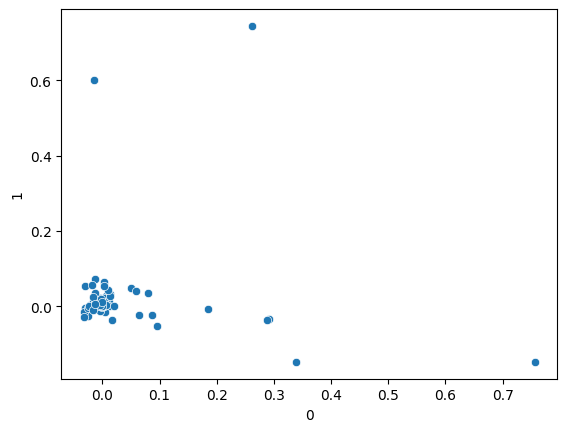

In [140]:
sns.scatterplot(data = pd.DataFrame(u[:,:3]), x = 0, y = 1)

In [32]:
import umap

/Users/guilhermegomes/Documents/maiagomes/maiagomes/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [241]:
_df_ = daily.drop(columns=['WFC','ZEN','ZNGA','AUY','BTC']).dropna()

In [247]:
np.log(_df_.iloc[1:,])

ABBV       CLF      ABEV        SU       SOL  \
Date                                                                    
2023-05-02 20:00:00  5.022234  2.721295  1.029619  3.374169  1.374171   
2023-05-03 20:00:00  5.007296  2.708050  1.057790  3.343215  1.363537   
2023-05-04 20:00:00  4.994438  2.663053  1.068153  3.350255  1.348073   
2023-05-05 20:00:00  5.000989  2.704711  1.061257  3.387774  1.381282   
2023-05-08 20:00:00  4.993489  2.716018  1.050822  3.401197  1.376244   
...                       ...       ...       ...       ...       ...   
2024-02-28 20:00:00  4.976527  2.694627  0.908259  3.511545  0.810930   
2024-02-29 20:00:00  4.976527  2.694627  0.908259  3.511545  0.802002   
2024-03-01 20:00:00  4.976527  2.694627  0.908259  3.511545  0.828552   
2024-03-04 20:00:00  4.976527  2.694627  0.908259  3.511545  0.746688   
2024-03-05 20:00:00  4.976527  2.694627  0.908259  3.511545  0.712950   

                          AMD      BKKT       XOM       NIO       IVV  ...  \
Date                                                                   ...   
2023-05-02 20:00:00  4.431888  0.277632  4.701117  2.002830  6.022066  ...   
2023-05-03 20:00:00  4.398023  0.300105  4.673856  2.026832  6.011782  ...   
2023-05-04 20:00:00  4.468548  0.300105  4.664853  2.088153  6.011635  ...   
2023-05-05 20:00:00  4.497028  0.392042  4.687487  2.102914  6.026735  ...   
2023-05-08 20:00:00  4.551769  0.336472  4.692723  2.110213  6.027121  ...   
...                       ...       ...       ...       ...       ...  ...   
2024-02-28 20:00:00  4.609162  0.009950  4.695925  2.037317  6.231819  ...   
2024-02-29 20:00:00  4.609162 -0.438505  4.695925  2.037317  6.235293  ...   
2024-03-01 20:00:00  4.609162 -0.515838  4.695925  2.037317  6.244924  ...   
2024-03-04 20:00:00  4.609162 -0.446287  4.695925  2.037317  6.243740  ...   
2024-03-05 20:00:00  4.609162 -0.510826  4.695925  2.037317  6.233587  ...   

                          HPE      BABA        GM       SWN      NFLX  \
Date                                                                    
2023-05-02 20:00:00  2.655352  4.399989  3.496508  1.564441  5.759564   
2023-05-03 20:00:00  2.634045  4.400603  3.482470  1.536867  5.767102   
2023-05-04 20:00:00  2.634762  4.415824  3.460095  1.530373  5.774117   
2023-05-05 20:00:00  2.646175  4.426044  3.503754  1.558145  5.775483   
2023-05-08 20:00:00  2.646175  4.422809  3.514228  1.570697  5.802360   
...                       ...       ...       ...       ...       ...   
2024-02-28 20:00:00  2.712042  4.393770  3.378952  1.957274  6.393298   
2024-02-29 20:00:00  2.712042  4.393770  3.378952  1.957274  6.396096   
2024-03-01 20:00:00  2.712042  4.393770  3.378952  1.957274  6.428396   
2024-03-04 20:00:00  2.712042  4.393770  3.378952  1.957274  6.419995   
2024-03-05 20:00:00  2.712042  4.393770  3.378952  1.957274  6.393975   

                         LYFT       PCG        QS      LCID       MRK  
Date                                                                   
2023-05-02 20:00:00  2.360854  2.848392  1.824549  1.982380  4.770261  
2023-05-03 20:00:00  2.387845  2.861629  1.826467  2.006871  4.767714  
2023-05-04 20:00:00  2.204972  2.849550  1.809927  2.002763  4.765587  
2023-05-05 20:00:00  2.151762  2.848971  1.848455  2.046402  4.762174  
2023-05-08 20:00:00  2.143589  2.857045  1.848455  1.951608  4.772378  
...                       ...       ...       ...       ...       ...  
2024-02-28 20:00:00  2.752386  2.756205  1.837370  1.155308  4.638121  
2024-02-29 20:00:00  2.764431  2.756205  1.837370  1.187843  4.638121  
2024-03-01 20:00:00  2.791165  2.756205  1.826161  1.205971  4.638121  
2024-03-04 20:00:00  2.830268  2.756205  1.811562  1.147402  4.638121  
2024-03-05 20:00:00  2.824351  2.756205  1.791759  1.153732  4.638121  

[212 rows x 73 columns]

In [259]:
lnmat = np.log(_df_.iloc[1:,]).diff(axis = 0)[1:]
# - np.log(_df_.iloc[:-1,])



In [263]:
lnmat_discretized = -1*(lnmat<0)+(lnmat>0)

In [292]:
lnmat_discretized_full = 1*(lnmat_discretized!=0)

ABBV  CLF  ABEV   SU  SOL  AMD  BKKT  XOM  NIO  IVV  ...  HPE  BABA  \
ABBV   120  120   117  120  117  120   110  120  119  120  ...  118   119   
CLF    120  120   117  120  117  120   110  120  119  120  ...  118   119   
ABEV   117  117   117  117  114  117   107  117  116  117  ...  115   116   
SU     120  120   117  120  117  120   110  120  119  120  ...  118   119   
SOL    117  117   114  117  205  117   193  117  116  205  ...  115   116   
...    ...  ...   ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   ...   
LYFT   120  120   117  120  205  120   199  120  119  211  ...  118   119   
PCG    117  117   114  117  114  117   108  117  116  117  ...  115   116   
QS     117  117   114  117  130  117   122  117  116  133  ...  116   116   
LCID   120  120   117  120  202  120   196  120  119  208  ...  118   119   
MRK    120  120   117  120  117  120   110  120  119  120  ...  118   119   

       GM  SWN  NFLX  LYFT  PCG   QS  LCID  MRK  
ABBV  120  116   120   120  117  117   120  120  
CLF   120  116   120   120  117  117   120  120  
ABEV  117  113   117   117  114  114   117  117  
SU    120  116   120   120  117  117   120  120  
SOL   117  113   205   205  114  130   202  117  
...   ...  ...   ...   ...  ...  ...   ...  ...  
LYFT  120  116   211   211  117  133   208  120  
PCG   117  113   117   117  117  114   117  117  
QS    117  113   133   133  114  133   132  117  
LCID  120  116   208   208  117  132   208  120  
MRK   120  116   120   120  117  117   120  120  

[73 rows x 73 columns]

In [265]:
lnmat_discretized_graph = lnmat_discretized.T.dot(lnmat_discretized)

In [295]:
lnmat_discretized_graph/=(lnmat_discretized_full.T.dot(lnmat_discretized_full))

/var/folders/93/g3mybg_57p16jzvjbpkk1jlw0000gn/T/ipykernel_14271/3827563014.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_result[:, 0], umap_result[:, 1], cmap='viridis', s=5)


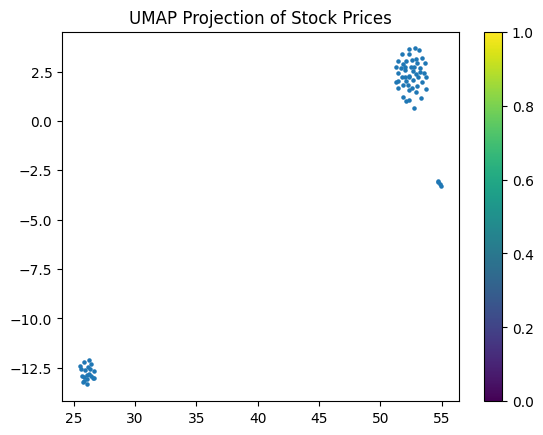

In [370]:
umap_model = umap.UMAP(n_components=2)
umap_result = umap_model.fit_transform(np.abs(lnmat_discretized.T))

# Plot the UMAP results
plt.scatter(umap_result[:, 0], umap_result[:, 1], cmap='viridis', s=5)
plt.title('UMAP Projection of Stock Prices')
plt.colorbar()
plt.show()

In [353]:
# lnmat_discretized_graph['GOLD'].sort_values().head(20)

In [354]:
u,d,v = svd(abs(lnmat_discretized_graph))

In [355]:
ids = dict(zip(list(lnmat.T.index),range(lnmat.shape[1])))

In [356]:
def get_distance(a,b):
    return np.sqrt(((a-b)**2).sum())

In [357]:
a = get_distance(umap_result[ids['GOOGL'],],umap_result[ids['DWAC'],])
b = get_distance(umap_result[ids['GOOGL'],],umap_result[ids['BMY'],])
c = get_distance(umap_result[ids['GOOGL'],],umap_result[ids['MSFT'],])
print(a,b,c)

14.538548 14.320637 0.6410459


In [358]:
a = get_distance(u[ids['GOOGL'],:4],u[ids['DWAC'],:4])
b = get_distance(u[ids['GOOGL'],:4],u[ids['BMY'],:4])
c = get_distance(u[ids['GOOGL'],:4],u[ids['MSFT'],:4])
print(a,b,c)

0.3646570841720564 0.44269154004450056 0.04685725441508166


In [374]:
pd.DataFrame(umap_result,columns=['proj1','proj2'], index = lnmat_discretized.columns)

proj1      proj2
ABBV  52.912842   2.392850
CLF   51.768188   2.231406
ABEV  52.021420   2.224785
SU    52.303932   2.250586
SOL   25.805880 -12.936632
...         ...        ...
LYFT  25.664690 -12.892157
PCG   53.132816   3.589112
QS    54.927216  -3.314489
LCID  26.049351 -13.339782
MRK   51.806992   1.825730

[73 rows x 2 columns]

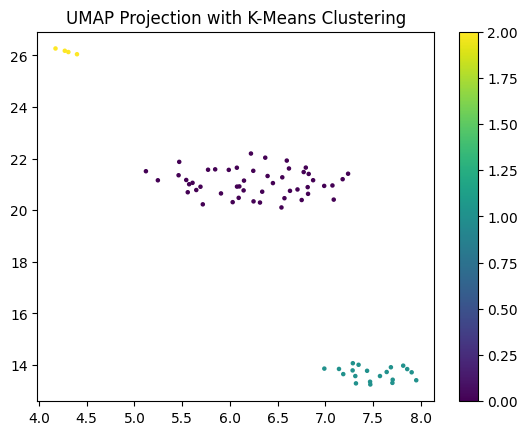

In [365]:
from sklearn.cluster import KMeans

num_clusters = 3  # You can adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(umap_result[:,:num_clusters])

# Plot the clustered UMAP results
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_labels, cmap='viridis', s=5)
plt.title('UMAP Projection with K-Means Clustering')
plt.colorbar()
plt.show()

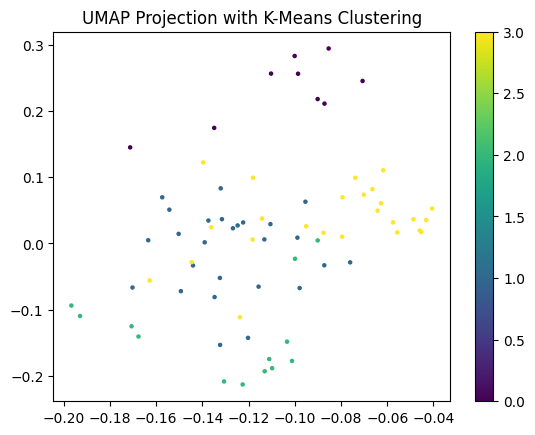

In [361]:
from sklearn.cluster import KMeans

num_clusters = 4  # You can adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(u[:,:num_clusters])

# Plot the clustered UMAP results
plt.scatter(u[:, 0], u[:, 1], c=cluster_labels, cmap='viridis', s=5)
plt.title('UMAP Projection with K-Means Clustering')
plt.colorbar()
plt.show()

In [362]:
cluster_labels

array([3, 1, 3, 0, 1, 2, 3, 0, 3, 2, 1, 2, 3, 0, 3, 0, 1, 3, 3, 0, 3, 1,
       1, 3, 2, 2, 1, 0, 1, 1, 3, 2, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 3, 3, 3, 1, 3, 3, 1, 3, 0, 2, 1, 1, 1, 1, 2, 0, 3, 3, 1, 3, 1,
       0, 2, 1, 3, 1, 1, 3], dtype=int32)

In [368]:
print(cluster_labels[ids['GOOGL']])
print(cluster_labels[ids['BMY']])

1
0
